In [731]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# sklearn library imports.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
from yellowbrick.classifier import ClassificationReport, ROCAUC

# try some new interactive plot libarary for this project
import plotly.express as px

In [732]:
bank = pd.read_csv("bank-full.csv")

In [733]:
bank_df = bank.copy()

In [734]:
len(bank_df)

45211

In [735]:
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [736]:
bank_df["age"].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [737]:
len(bank_df[bank_df["campaign"]=="unknown"])

0

In [738]:
bank_df[bank_df["job"]=="unknown"]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
216,47,unknown,married,unknown,no,28,no,no,unknown,5,may,338,2,-1,0,unknown,no
354,59,unknown,divorced,unknown,no,27,no,no,unknown,5,may,347,3,-1,0,unknown,no
876,37,unknown,single,unknown,no,414,yes,no,unknown,7,may,131,1,-1,0,unknown,no
1072,29,unknown,single,primary,no,50,yes,no,unknown,7,may,50,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44714,45,unknown,married,tertiary,no,406,no,no,cellular,7,sep,314,1,-1,0,unknown,yes
44742,64,unknown,married,unknown,no,2799,no,no,telephone,9,sep,378,4,-1,0,unknown,no
44970,28,unknown,single,unknown,no,326,no,no,cellular,11,oct,450,1,231,1,success,yes
45141,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,success,no


In [739]:
bank_df["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [740]:
bank_df["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [741]:
bank_df["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [742]:
bank_df[bank_df["Target"] == "yes"]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [743]:
bank_df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [744]:
bank_df[bank_df["Target"] == "no"]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [745]:
def convert_target(x):
    if x == "no":
        return 0
    else:
        return 1

In [746]:
def convert_pdays(x):
    if x == -1:
        return 1800
    else:
        return x

In [747]:
bank_df["Target"] = bank_df["Target"].apply(convert_target)
bank_df["default"] = bank_df["default"].apply(convert_target)
bank_df["housing"] = bank_df["housing"].apply(convert_target)
bank_df["loan"] = bank_df["loan"].apply(convert_target)
bank_df["pdays"] = bank_df["pdays"].apply(convert_pdays)

In [748]:
bank_df["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [749]:
bank_df.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.004754,0.001288,0.025155
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,0.040115,-0.018329,-0.022419
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,-0.033863,0.016674,0.052838
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,-0.052167,0.037076,-0.139173
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,0.031834,-0.011043,-0.068185
day,-0.009120,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,0.082936,-0.051710,-0.028348
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.004347,0.001203,0.394521
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,0.108499,-0.032855,-0.073172
pdays,-0.004754,0.040115,-0.033863,-0.052167,0.031834,0.082936,-0.004347,0.108499,1.000000,-0.532744,-0.173599
previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,-0.051710,0.001203,-0.032855,-0.532744,1.000000,0.093236


In [750]:
bank_df["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [751]:
cleanup_nums = {"job": {"student": 10,"unemployed":5,"housemaid":30,"services": 40,"technician": 50, "admin": 60, "retired": 70, "self-employed": 80,"blue-collar": 200,"management":500,"entrepreneur":1000,"admin.":60,"unknown": 100},
               "marital":{"single":10, "married": 20,"divorced":30},
               "education": {"primary":1, "secondary": 50, "tertiary": 100,"unknown": -1}}

In [752]:
bank_df.replace(cleanup_nums, inplace=True)

In [753]:
bank_df["job"].unique()

array([ 500,   50, 1000,  200,  100,   70,   60,   40,   80,    5,   30,
         10])

In [754]:
bank_df.corr()

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target
age,1.000000,-0.001648,0.403240,-0.175069,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.004754,0.001288,0.025155
job,-0.001648,1.000000,0.025282,0.331709,0.019968,0.049557,0.004573,0.005129,0.007562,-0.005115,0.018013,0.004832,0.005145,-0.008062
marital,0.403240,0.025282,1.000000,-0.109539,0.007023,-0.002122,0.016096,0.046893,0.005261,-0.011852,0.008994,0.025288,-0.014973,-0.045588
education,-0.175069,0.331709,-0.109539,1.000000,-0.010577,0.060344,-0.057233,-0.009403,0.024388,0.002665,0.001935,-0.044039,0.026167,0.061202
default,-0.017879,0.019968,0.007023,-0.010577,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,0.040115,-0.018329,-0.022419
balance,0.097783,0.049557,-0.002122,0.060344,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,-0.033863,0.016674,0.052838
housing,-0.185513,0.004573,0.016096,-0.057233,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,-0.052167,0.037076,-0.139173
loan,-0.015655,0.005129,0.046893,-0.009403,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,0.031834,-0.011043,-0.068185
day,-0.009120,0.007562,0.005261,0.024388,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,0.082936,-0.051710,-0.028348
duration,-0.004648,-0.005115,-0.011852,0.002665,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.004347,0.001203,0.394521


In [755]:
from sklearn.preprocessing import LabelEncoder

In [756]:
lb_make = LabelEncoder()

In [757]:
bank_df["poutcome_code"]= lb_make.fit_transform(bank_df["poutcome"])
bank_df["contact_code"]= lb_make.fit_transform(bank_df["contact"])
bank_df["month_code"]= lb_make.fit_transform(bank_df["month"])
#bank_df["day_code"]= lb_make.fit_transform(bank_df["day"])
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,poutcome_code,contact_code,month_code
0,58,500,20,100,0,2143,1,0,unknown,5,may,261,1,1800,0,unknown,0,3,2,8
1,44,50,10,50,0,29,1,0,unknown,5,may,151,1,1800,0,unknown,0,3,2,8
2,33,1000,20,50,0,2,1,1,unknown,5,may,76,1,1800,0,unknown,0,3,2,8
3,47,200,20,-1,0,1506,1,0,unknown,5,may,92,1,1800,0,unknown,0,3,2,8
4,33,100,10,-1,0,1,0,0,unknown,5,may,198,1,1800,0,unknown,0,3,2,8
5,35,500,20,100,0,231,1,0,unknown,5,may,139,1,1800,0,unknown,0,3,2,8
6,28,500,10,100,0,447,1,1,unknown,5,may,217,1,1800,0,unknown,0,3,2,8
7,42,1000,30,100,1,2,1,0,unknown,5,may,380,1,1800,0,unknown,0,3,2,8
8,58,70,20,1,0,121,1,0,unknown,5,may,50,1,1800,0,unknown,0,3,2,8
9,43,50,10,50,0,593,1,0,unknown,5,may,55,1,1800,0,unknown,0,3,2,8


In [758]:
bank_df.corr()

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,Target,poutcome_code,contact_code,month_code
age,1.000000,-0.001648,0.403240,-0.175069,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.004754,0.001288,0.025155,0.007367,0.026221,-0.042357
job,-0.001648,1.000000,0.025282,0.331709,0.019968,0.049557,0.004573,0.005129,0.007562,-0.005115,0.018013,0.004832,0.005145,-0.008062,0.001191,-0.039140,0.006243
marital,0.403240,0.025282,1.000000,-0.109539,0.007023,-0.002122,0.016096,0.046893,0.005261,-0.011852,0.008994,0.025288,-0.014973,-0.045588,0.016850,0.039201,0.006991
education,-0.175069,0.331709,-0.109539,1.000000,-0.010577,0.060344,-0.057233,-0.009403,0.024388,0.002665,0.001935,-0.044039,0.026167,0.061202,-0.028172,-0.158224,-0.075439
default,-0.017879,0.019968,0.007023,-0.010577,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,0.040115,-0.018329,-0.022419,0.034898,0.015404,0.011486
balance,0.097783,0.049557,-0.002122,0.060344,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,-0.033863,0.016674,0.052838,-0.020967,-0.027273,0.019777
housing,-0.185513,0.004573,0.016096,-0.057233,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,-0.052167,0.037076,-0.139173,-0.099971,0.188123,0.271481
loan,-0.015655,0.005129,0.046893,-0.009403,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,0.031834,-0.011043,-0.068185,0.015458,-0.010873,0.022145
day,-0.009120,0.007562,0.005261,0.024388,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,0.082936,-0.051710,-0.028348,0.083460,-0.027936,-0.006028
duration,-0.004648,-0.005115,-0.011852,0.002665,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.004347,0.001203,0.394521,0.010925,-0.020839,0.006314


In [759]:
bank_df.drop(["contact","poutcome","month"],inplace=True,axis=1)

In [760]:
X = bank_df.drop('Target', axis=1)
Y = bank_df[['Target']]

In [761]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

In [762]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome_code,contact_code,month_code
6149,32,200,20,50,1,-238,1,0,27,427,1,1800,0,3,2,8
12403,34,60,10,50,0,-478,1,1,27,111,4,1800,0,3,2,6
21645,32,50,20,50,0,266,1,0,19,168,2,1800,0,3,0,1
29580,36,200,20,50,1,13,0,1,3,150,4,1800,0,3,0,3
31245,23,10,10,50,0,486,0,0,3,87,1,1800,0,3,0,7


In [763]:
regmodel = LogisticRegression(random_state=42,penalty="l1",C=0.95,solver="liblinear")

In [764]:
regmodel.fit(X_train, y_train)

LogisticRegression(C=0.95, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [765]:
 y_predict = regmodel.predict(X_test)

In [766]:
regmodel.score(X_train, y_train)

0.8999589218567321

In [767]:
regmodel.score(X_test, y_test)

0.8991447950457092

In [768]:
# Now for cheking model performance, define some useful score functions.
def get_confusion_matrix( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

# function for drawing ROC curve.
def draw_roc_curve(model):
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

# Check model performance parameters.Like Confusion Matrix,model score on training/testing,recall,precision.
def get_models_matrix(model):
    print("Trainig accuracy",model.score(X_train,y_train))  
    print()
    print("Testing accuracy",model.score(X_test, y_test))
    print()
    print('Confusion Matrix')
    get_confusion_matrix(y_test,y_predict)
    print()
    print("Recall:",recall_score(y_test,y_predict))
    print()
    print("Precision:",precision_score(y_test,y_predict))
    print()
    print("F1 Score:",f1_score(y_test,y_predict))
    print()
    print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

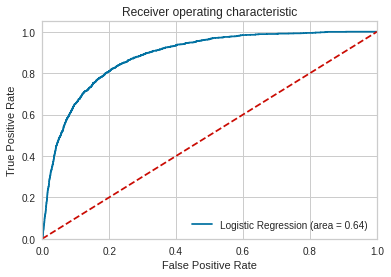

In [769]:
draw_roc_curve(regmodel)

Trainig accuracy 0.8999589218567321

Testing accuracy 0.8991447950457092

Confusion Matrix


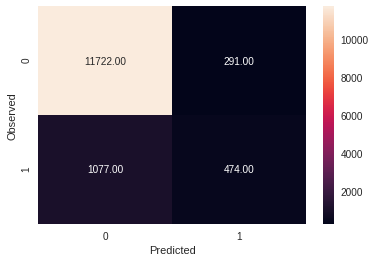


Recall: 0.3056092843326886

Precision: 0.6196078431372549

F1 Score: 0.40932642487046633

Roc Auc Score: 0.6406927633683753


In [770]:
get_models_matrix(regmodel)

In [771]:
from sklearn.tree import DecisionTreeClassifier
model_entropy = DecisionTreeClassifier(criterion='entropy')

In [772]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [773]:
print("Train: %.2f" % model_entropy.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, y_test))

Train: 1.00
Test: 0.88


In [777]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", max_depth=4)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [778]:
print("Train: %.2f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, y_test))  # pe

Train: 0.90
Test: 0.90


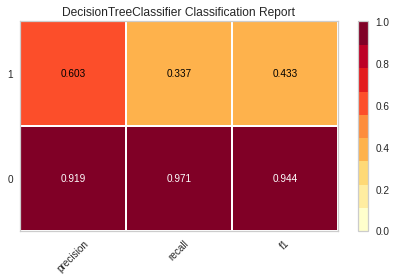

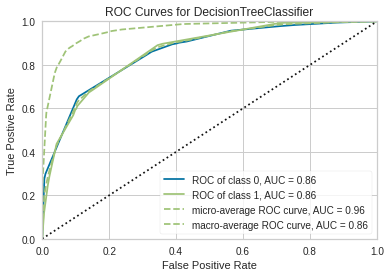

In [779]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()